# Naïve Bayes

The Naive Bayes Algorithm is a vital machine learning tool for classification based on Bayes' probability theory. It excels in training high-dimensional datasets for text classification. Common uses include sentiment analysis, news article classification, and spam filtering.  It assumes all features are independent and uses various distributions like Bernoulli for binary data, Multinomial for word counts, and Gaussian for continuous values. By storing feature probabilities for each class, it calculates the likelihood of an observation belonging to a particular class.

The objective in this section includes preparing textual and record data for performing naive bayes classification. The goal is to select the optimal number of features that will increase the likelihood of the model to predict different gorupings accurately. 

There are different variants of Naive Bayes such as Gaussian, Multinomial and Bernoulli Naive Bayes. These variants are tailored for different types of data: Gaussian for continuous data that follow a normal distribution, Multinomial for discrete counts like in text analysis, and Bernoulli for binary data outcomes. Selecting the right variant is crucial; for example, text classification would be best served by Multinomial, while binary outcomes would lean on Bernoulli, and continuous data on Gaussian.

# Text Data

## Preparing Data for Naïve Bayes:

# Feature selection for text data

In [4]:
import wikipedia
import nltk
import string 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [10]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../data-gathering/wiki-crawl-results.csv')  
print(df.shape)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])

(1225, 3)
index = 0 : label = electric vehicle
index = 1 : label = gasoline vehicle
index = 2 : label = hybrid vehicle
number of text chunks =  1225
['electric motive power started 1827 hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car 1835 professor sibrandus stratingh university groningen netherlands built small scale electric car sometime 1832 1839 robert anderson scotland invented first crude electric carriage powered non rechargeable primary cell american blacksmith inventor thomas davenport built toy electric locomotive powered primitive electric motor 1835 1838 scotsman named robert davidson built electric locomotive attained speed four mile per hour km england patent granted 1840 use rail conductor electric current similar american patent issued lilley colten 1847', 'first mass produced appeared america early 1900s 1902 studebaker automobile company entered automotive business though also entered gas

### Vectorize

In [11]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)

(1225, 5269) (1225,) (1225,)


### Partition Data

In [12]:
# BEFORE SPLIT
print(y1[1000:1200])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:
# INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST

from sklearn.model_selection import train_test_split
test_ratio=0.2

# SPLIT ARRAYS OR MATRICES INTO RANDOM TRAIN AND TEST SUBSETS.
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (980, 5269)
y_train.shape		: (980,)
X_test.shape		: (245, 5269)
y_test.shape		: (245,)


In [14]:
#CHECK TO MAKE SURE IT WAS RANDOMIZED 
print(y_train[0:100])

[0 1 1 2 1 2 2 1 0 0 1 1 2 0 2 0 1 0 0 2 0 1 1 0 1 1 2 2 1 1 1 1 0 0 2 0 1
 0 1 1 0 1 2 2 1 2 1 2 1 2 1 2 0 1 1 2 0 2 0 2 0 1 2 2 2 0 1 0 0 0 0 1 2 2
 1 0 1 1 1 1 0 0 1 0 2 1 0 0 1 2 0 1 1 1 2 1 1 0 0 0]


### Utility function

* Write a function to report accuracy
* Note this will act on object stored in pythons global scope. Therefore as long as everything is named the same you can recycle it for multiple models

In [15]:

def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = "output"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)

In [17]:
df=pd.read_csv("ev-wiki-crawl-results.csv")
print(df.shape)
print(df.columns)

(1225, 3)
Index(['text', 'label', 'sentiment'], dtype='object')


In [18]:
reviews=[]
y=[]
#ITERATE OVER ROWS
# for i in range(0,10):  
for i in range(0,df.shape[0]):
    # QUICKLY CLEAN TEXT
    keep="abcdefghijklmnopqrstuvwxyz "
    replace=".,!;"
    tmp=""
    for char in df["text"][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    tmp=" ".join(tmp.split())
    reviews.append(tmp)
    # CONVERT STRINGS TO INT TAGS
    if(df["sentiment"][i] >= 0):
        y.append(1)
    if(df["sentiment"][i] < 0):
        y.append(0)

    #PRINT FIRST COUPLE REVIEWS
    if(i<3):
        print(i)
        print(df["text"][i].replace("<br />",""),'\n')
        print(tmp)
        print(df["sentiment"][i],y[i])

0
electric motive power started 1827 hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car 1835 professor sibrandus stratingh university groningen netherlands built small scale electric car sometime 1832 1839 robert anderson scotland invented first crude electric carriage powered non rechargeable primary cell american blacksmith inventor thomas davenport built toy electric locomotive powered primitive electric motor 1835 1838 scotsman named robert davidson built electric locomotive attained speed four mile per hour km england patent granted 1840 use rail conductor electric current similar american patent issued lilley colten 1847 

electric motive power started hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car professor sibrandus stratingh university groningen netherlands built small scale electric car sometime robert anderson scotlan

In [19]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

In [20]:
#DOUBLE CHECK SIZE
print(len(reviews),len(y))

1225 1225


In [21]:
# PARAMETERS TO CONTROL SIZE OF FEATURE SPACE WITH COUNT-VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
# max_features=int, default=None
#   If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(reviews,MAX_FEATURES=10000)

In [22]:
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(1225, 7140) (1225,)


In [23]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [24]:
# CHECK VOCAB KEY-VALUE PAIRS
print(list(vocab1.keys())[0:10])
print(list(vocab1.values())[0:10])

[2067, 4180, 4914, 6120, 3085, 4986, 4397, 3469, 784, 1525]
['electric', 'motive', 'power', 'started', 'hungarian', 'priest', 'nyos', 'jedlik', 'built', 'crude']


In [25]:
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))

[1. 6. 1. ... 8. 1. 2.]


In [26]:
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   6865  2067  884   3091  2672  2181  4181  562   2727  6810  ...  2551  \
0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
1   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
3   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0  ...   0.0   

   2555  5113  2554  5115  2553  2552  5118  5119  0     
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 7140 columns]


In [27]:
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[5824])
print(vocab2[1],vocab1[3386])


vehicle shai
electric inverse


In [28]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0     1     2     3     4     5     6     7     8     9     ...  7130  \
0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
1   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0  ...   0.0   
2   1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
3   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   0.0   
4   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0  ...   0.0   

   7131  7132  7133  7134  7135  7136  7137  7138  7139  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 7140 columns]
0       716.0
1       566.0
2       559.0
3       530.0
4       458.0
        ...  
7135      1.0
7136      1.0
7137      1.0
7138      1.0
7139      1.0
Length: 7140, dt

In [29]:
# DOUBLE CHECK 
print(x.shape,y.shape)

(1225, 7140) (1225,)


In [30]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[255, 351, 95, 175, 1057, 1093, 34, 682, 237, 131]
[940, 19, 1073, 1042, 312, 196, 932, 967, 184, 749]


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1225, 7140) (1225,)
(1225, 7140) (1225,)
95.71428571428572 84.48979591836735 0.107567999999997 0.08087099999999836


## Search-1: Remove features from high to low

In [32]:
#UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [33]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 50 50 82.44897959183673 77.9591836734694
10 100 100 84.28571428571429 76.32653061224491
15 150 150 85.0 74.28571428571429
20 200 200 84.28571428571429 74.6938775510204
25 250 250 85.91836734693878 75.51020408163265
30 300 300 85.81632653061224 74.28571428571429
35 350 350 85.81632653061224 76.32653061224491


40 400 400 86.73469387755102 75.91836734693878
45 450 450 88.26530612244898 76.73469387755102
50 500 500 87.55102040816325 78.36734693877551
55 550 550 88.06122448979592 79.59183673469387
60 600 600 88.46938775510203 79.18367346938776
65 650 650 89.48979591836735 79.18367346938776
70 700 700 89.38775510204081 80.0
75 750 750 89.59183673469387 80.81632653061224
80 800 800 90.0 80.81632653061224
85 850 850 90.10204081632654 80.81632653061224
90 900 900 90.20408163265307 79.59183673469387
95 950 950 89.6938775510204 80.81632653061224
100 1000 1000 90.10204081632654 82.85714285714286
5 3250 3250 94.48979591836735 82.85714285714286
10 5500 5500 95.40816326530613 84.08163265306122
15 7750 7140 95.71428571428572 84.48979591836735
20 10000 7140 95.71428571428572 84.48979591836735


In [34]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [35]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

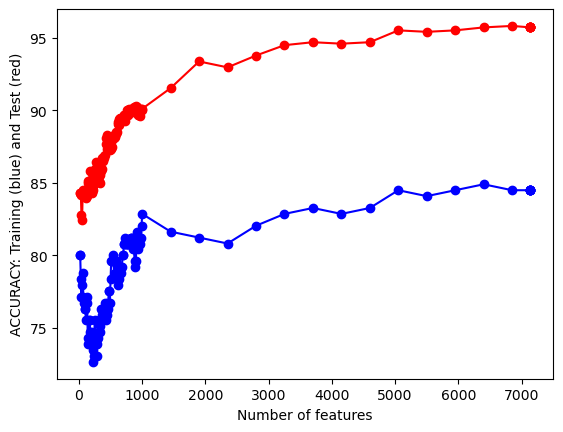

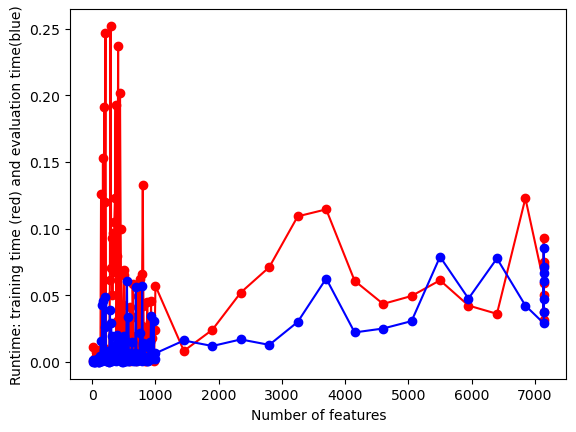

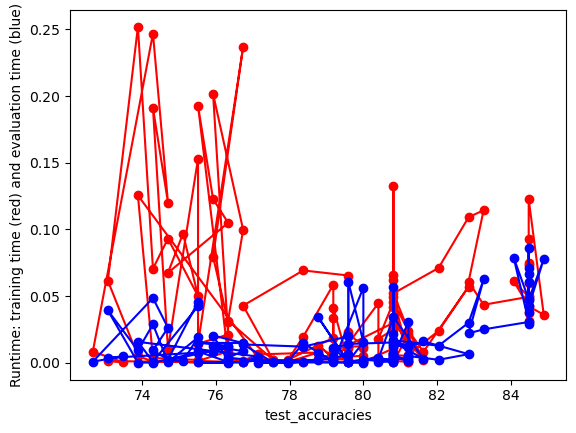

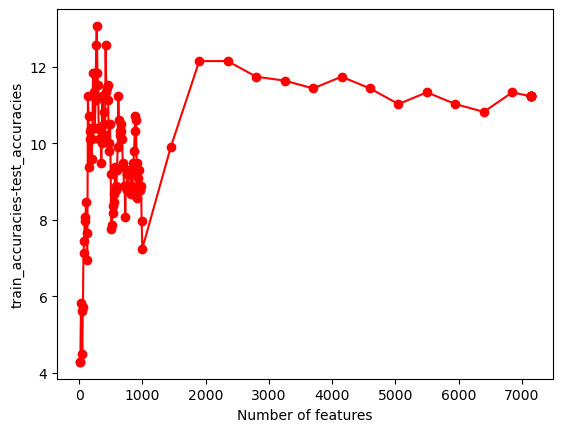

In [36]:
save_results(output_dir+"/partial_grid_search")
plot_results(output_dir+"/partial_grid_search")

From the images we can conclude that there's a trade-off between test accuracy and runtime; higher accuracies demand more processing time. As the number of features increases, initially there's a spike in test accuracy, which stabilizes and then slightly drops after peaking. The runtime generally rises with the number of features, but with several fluctuations.Training accuracy is consistently higher than test accuracy, indicating potential overfitting with more features.

## VarianceThreshold

In [37]:
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0008156601416076161
0.24855910037484058


In [38]:
from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

THRESHOLD = 0.009358537391029442 1088
THRESHOLD = 0.01790141464045127 609
THRESHOLD = 0.026444291889873094 414
THRESHOLD = 0.03498716913929492 278
THRESHOLD = 0.04353004638871675 211
THRESHOLD = 0.05207292363813857 155
THRESHOLD = 0.0606158008875604 127
THRESHOLD = 0.06915867813698222 95
THRESHOLD = 0.07770155538640404 73
THRESHOLD = 0.08624443263582587 61
THRESHOLD = 0.0947873098852477 52
THRESHOLD = 0.10333018713466952 43
THRESHOLD = 0.11187306438409135 36
THRESHOLD = 0.12041594163351317 32
THRESHOLD = 0.128958818882935 28
THRESHOLD = 0.13750169613235683 24
THRESHOLD = 0.14604457338177865 21
THRESHOLD = 0.15458745063120047 17
THRESHOLD = 0.16313032788062232 13
THRESHOLD = 0.17167320513004414 13
THRESHOLD = 0.18021608237946596 11
THRESHOLD = 0.18875895962888778 11
THRESHOLD = 0.1973018368783096 8
THRESHOLD = 0.20584471412773142 8
THRESHOLD = 0.21438759137715327 7
THRESHOLD = 0.2229304686265751 6
THRESHOLD = 0.2314733458759969 6


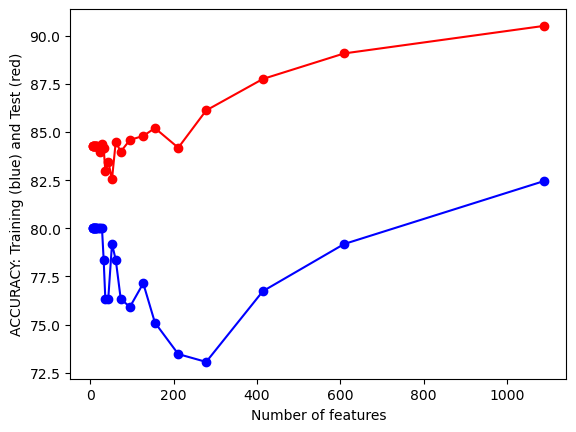

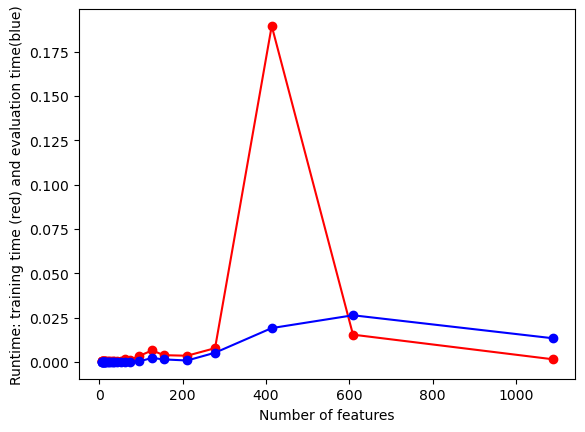

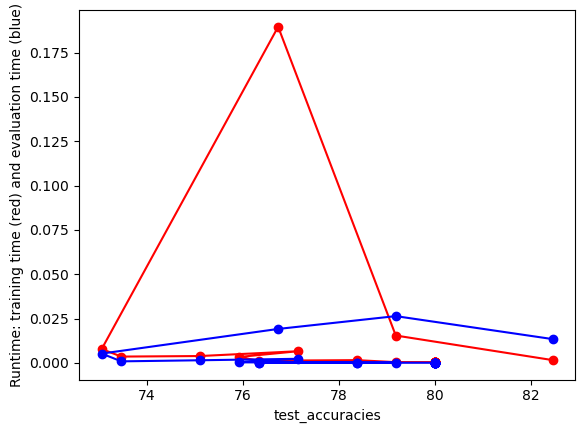

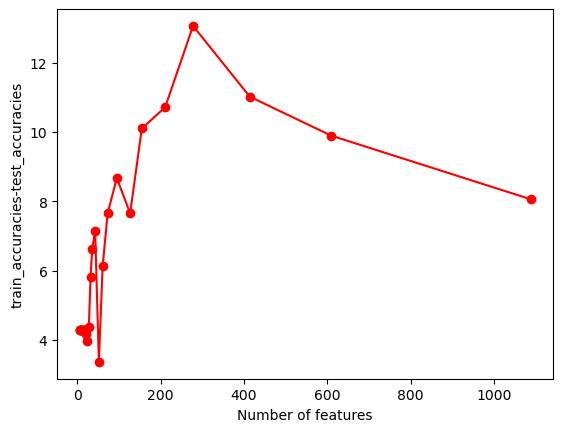

In [39]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

From the images, as test accuracies increase, runtime for training and evaluation generally rises. Using more features initially leads to fluctuating train-test accuracy differences, but stabilizes as features approach 1000. Overall accuracy for both training and test sets tends to increase with more features, despite some fluctuations. Training and evaluation time spikes around 200 features, then gradually decreases and remains relatively stable.

## Naïve Bayes (NB) with Labeled Text Data

When the model is trained, insert code to output the following information about the training and test set 
   * **Remember that the test set was NOT seen during the training process, and therefore "test" predictions show how the model does on new "unseen" data**

In [40]:
from sklearn.naive_bayes import MultinomialNB

# INITIALIZE MODEL 
model = MultinomialNB()

# TRAIN MODEL 
model.fit(x_train,y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 74.48979591836735
Number of mislabeled points out of a total 980 points = 250

TEST SET (UNTRAINED DATA):
Accuracy: 49.38775510204081
Number of mislabeled points out of a total 245 points = 124

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[0 1 1 2 1 2 2 1 0 0 1 1 2 0 2 0 1 0 0 2]
[2 2 2 0 1 2 2 1 0 0 1 1 2 0 0 0 0 0 0 0]
ERRORS: [ 2  1  1 -2  0  0  0  0  0  0  0  0  0  0 -2  0 -1  0  0 -2]

TEST SET (UNTRAINED DATA):
[2 0 2 0 1 2 2 2 0 1 2 1 0 0 2 0 0 1 2 2]
[0 1 0 2 1 0 2 2 0 1 1 1 2 0 1 0 2 1 2 0]
ERRORS: [-2  1 -2  2  0 -2  0  0  0  0 -1  0  2  0 -1  0  2  0  0 -2]


Overfitting happens when a model performs well on training data but poorly on new, unseen data. Under-fitting is when a model performs badly on both. With a training accuracy of 74.49% and a testing accuracy of 49.39%, the model seems to be overfitting, as it's not generalizing well to the test data.

In [41]:
# source: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(x_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.49387755102040815
F1 Score: 0.4899780925165164


The model was trained on a dataset and achieved an accuracy of 74.49% on the training set, but only 49.39% on the test set. The first 20 predictions and their errors are provided for both sets, indicating how much each prediction deviated from the expected result.

### Confusion matrix

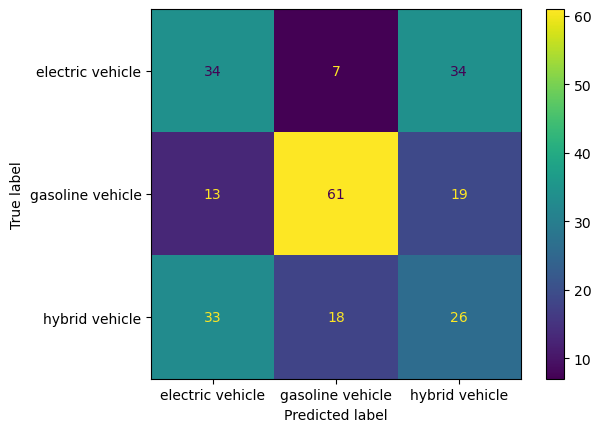

In [42]:
# source: https://developer.ibm.com/tutorials/awb-classifying-data-multinomial-naive-bayes-algorithm/
labels = ["electric vehicle", "gasoline vehicle", "hybrid vehicle"]

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Gasoline vehicles are most accurately predicted with 61 correct predictions.
Electric vehicles are often misclassified as hybrid, with 34 such cases.
Hybrid vehicles have a relatively even misclassification spread between electric and gasoline, with 33 and 18 instances, respectively.

### Compute distance matrix

Distance between sentence vectors for a subset of data

(250, 250)
[[0.         0.14535047 0.06180232 ... 0.02722664 0.06460021 0.12036163]
 [0.14535047 0.         0.1328735  ... 0.04682929 0.11111111 0.05175492]
 [0.06180232 0.1328735  0.         ... 0.08960215 0.1062988  0.02200594]
 ...
 [0.02722664 0.04682929 0.08960215 ... 0.         0.06243905 0.03877834]
 [0.06460021 0.11111111 0.1062988  ... 0.06243905 0.         0.02300219]
 [0.12036163 0.05175492 0.02200594 ... 0.03877834 0.02300219 0.        ]]


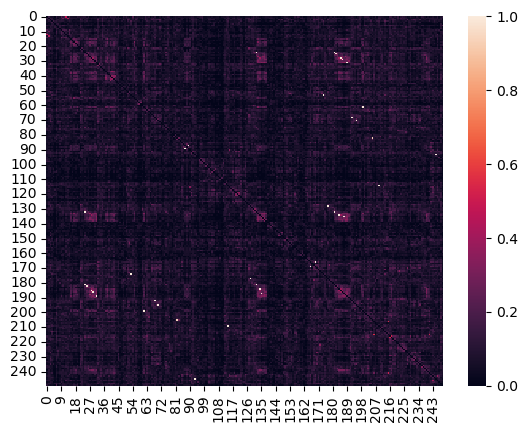

In [43]:
num_rows_keep=250
index=np.sort(np.random.choice(X.shape[0], num_rows_keep, replace=False))
# print(y1[index])
#print(index)
tmp1=X[index, :]
# print(tmp1.shape,tmp1.dtype,tmp1[:,].shape)

#COMPUTE DISTANCE MATRIX
dij=[]

#LOOP OVER ROWS
for i in range(0,tmp1.shape[0]):
    tmp2=[]
    #LOOP OVER ROWS
    for j in range(0,tmp1.shape[0]):

        #EXTRACT VECTORS
        vi=tmp1[i,:]
        vj=tmp1[j,:]
        #print(vi.shape,vj.shape)

        #COMPUTE DISTANCES
        dist=np.dot(vi, vj)/(np.linalg.norm(vi)*np.linalg.norm(vj)) #cosine sim
        #dist=np.linalg.norm(vi-vj) #euclidean

        # BUILD DISTANCE MATRIX
        if(i==j or np.max(vi) == 0 or np.max(vj)==0):
            tmp2.append(0)
        else:
            tmp2.append(dist)
    dij.append(tmp2); #print(dij)
        # raise
dij=np.array(dij)

#normalize
# dij=(dij-np.min(dij))/(np.max(dij)-np.min(dij))

#Lower triangle of an array.
# dij=np.sort(dij,axis=0)
# dij=np.sort(dij,axis=1)
# dij=np.tril(dij, k=-1) 


import seaborn as sns
# sns.heatmap(np.exp(dij), annot=False) #,  linewidths=.05)
sns.heatmap(dij, annot=False) #,  linewidths=.05)
print(dij.shape)
print(dij)

### PCA

[0.02781853 0.01541431 0.0131166  0.01048456 0.00973911 0.00917533
 0.00862828 0.00807481 0.00696539 0.00647609]
[43.65947765 32.49926167 29.97933483 26.80319506 25.83277827 25.07392669
 24.31495725 23.52218064 21.84661137 21.06531287]


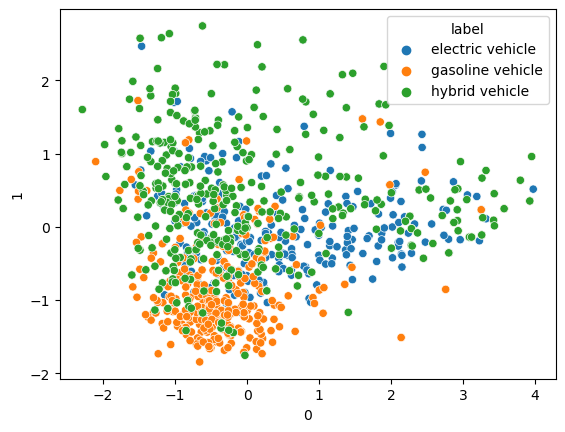

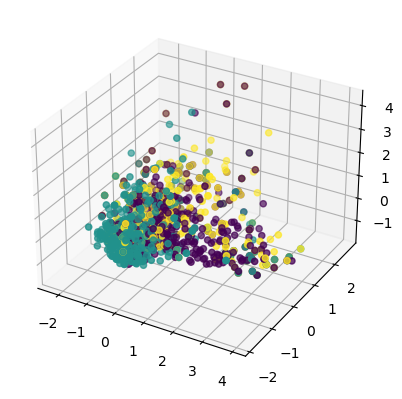

/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


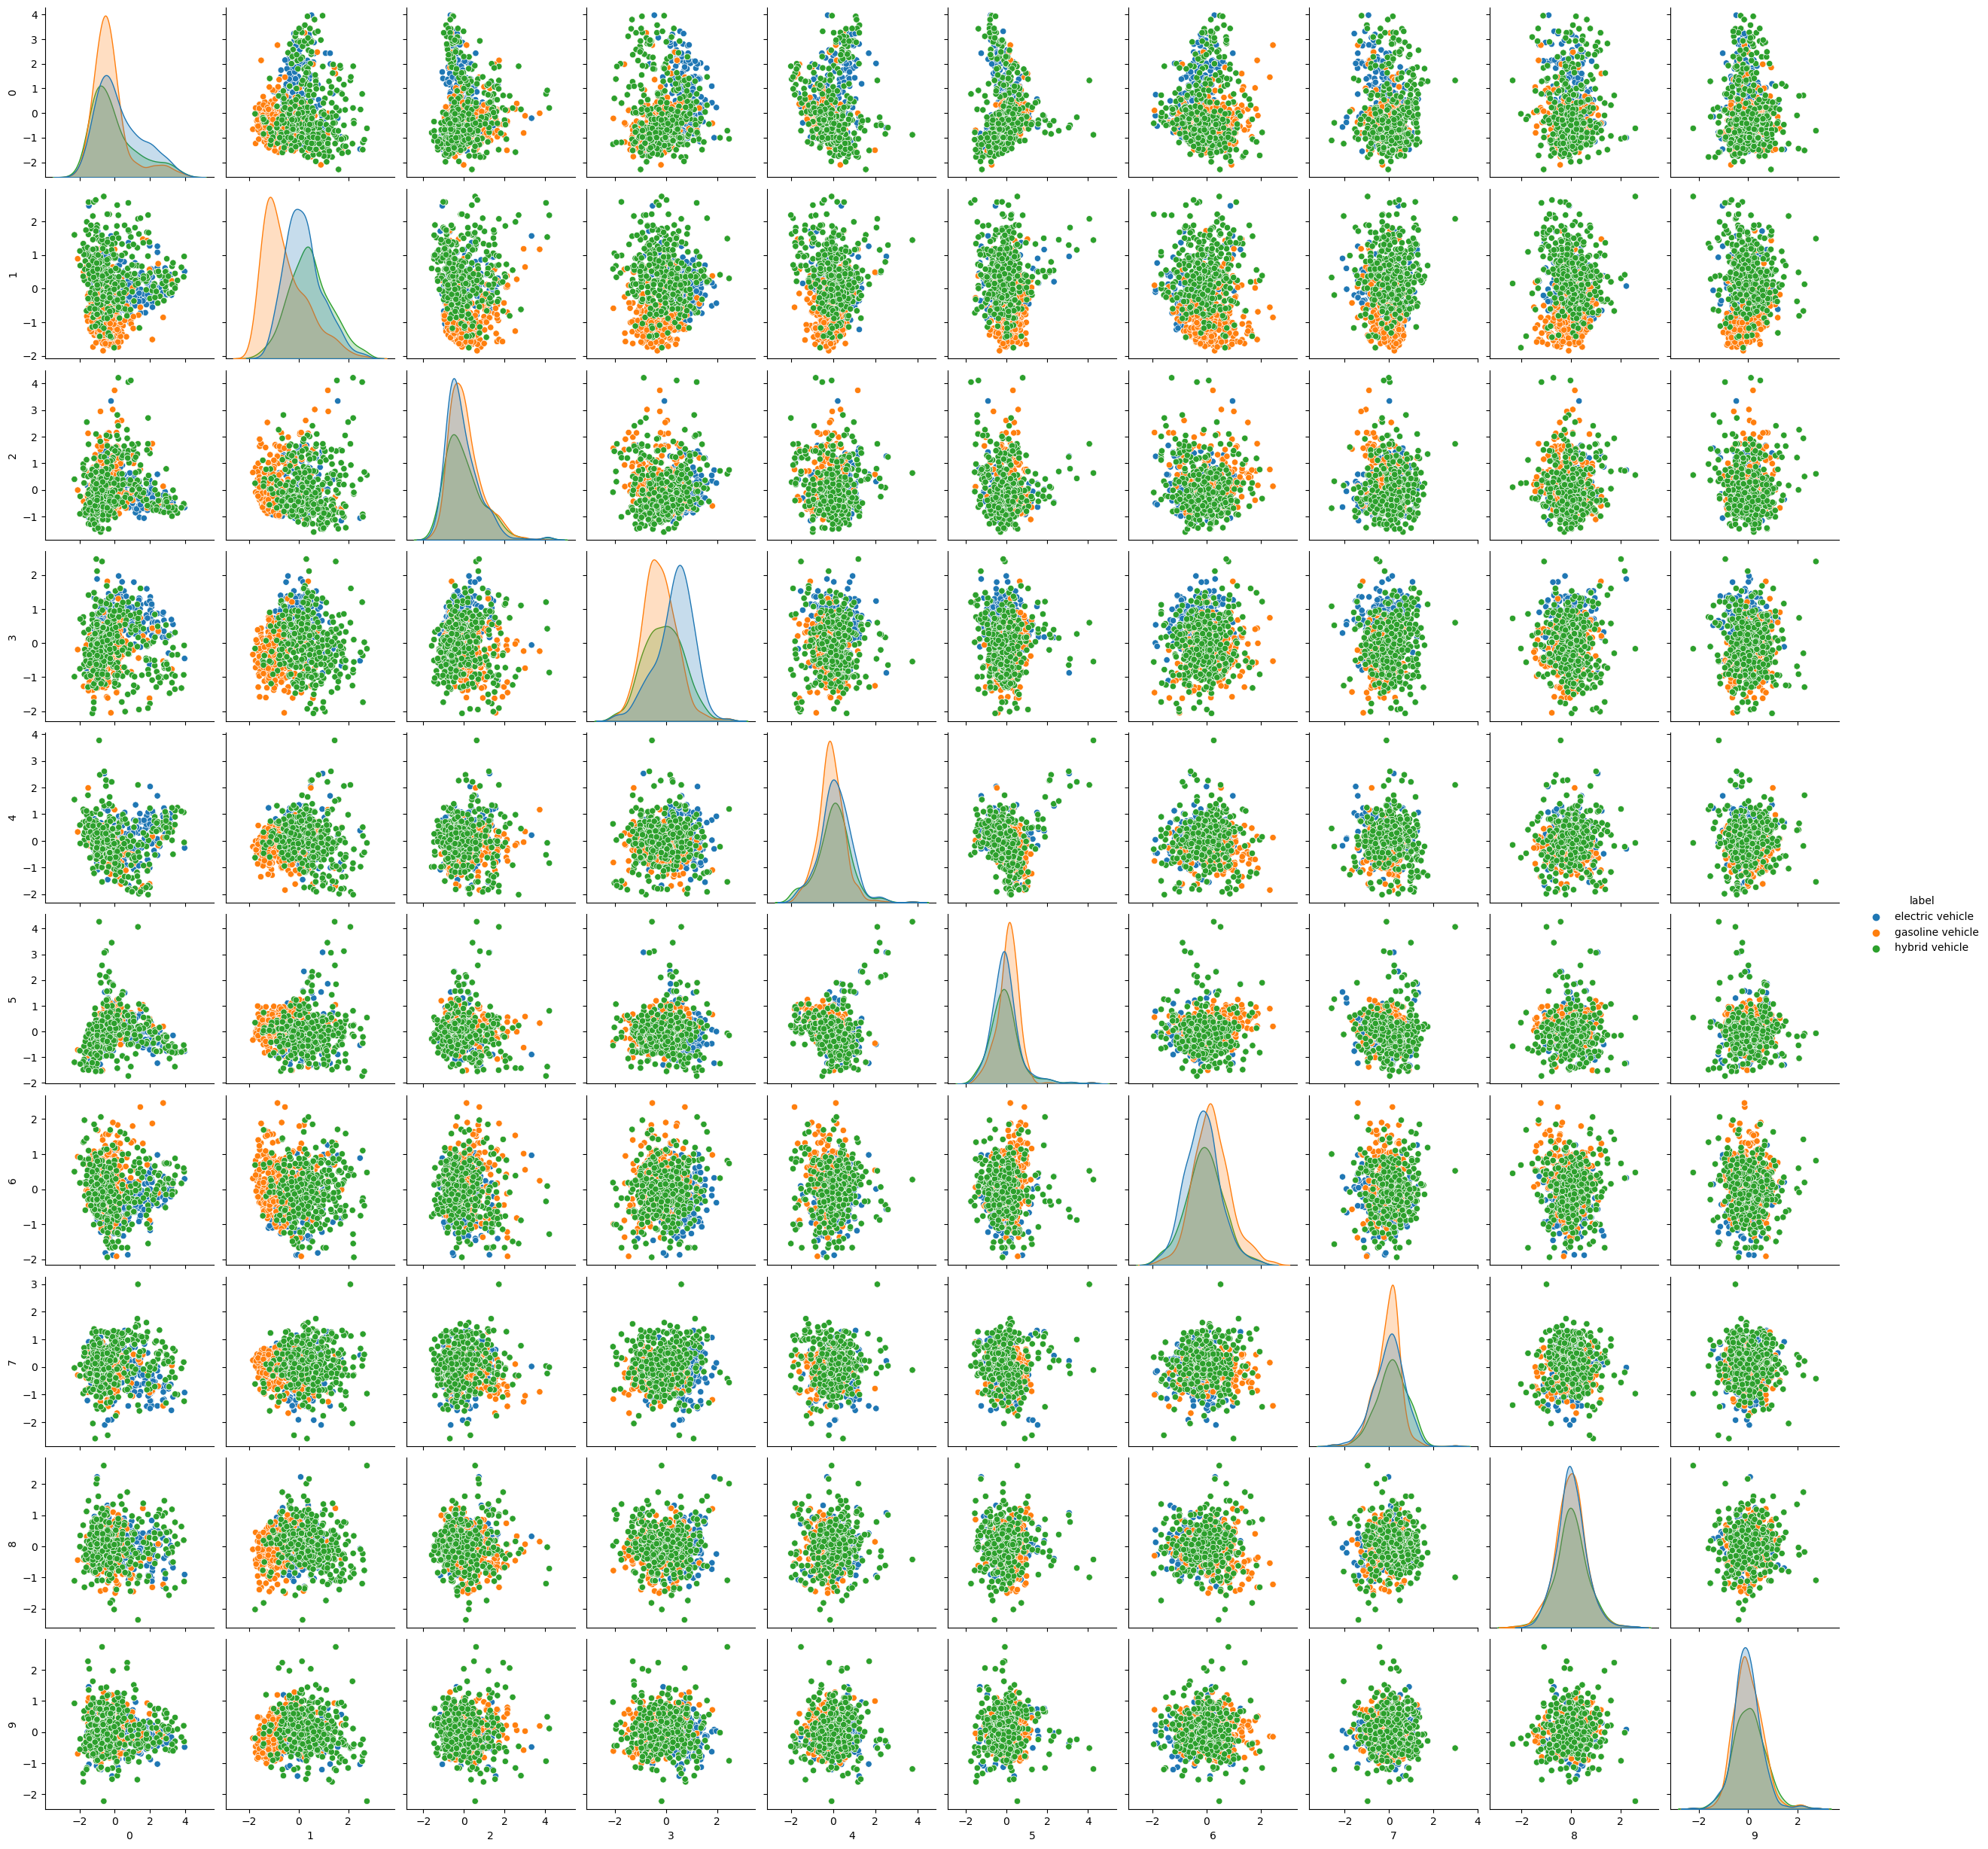

In [44]:
from sklearn.decomposition import PCA

# COMPUTE PCA WITH 10 COMPONENTS
pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

# GET PRINCIPLE COMPONENT PROJECTIONS 
principal_components = pca.fit_transform(X)
df2 = pd.DataFrame(data = principal_components) #, columns = ['PC1','PC2','PC3','PC4','PC5'])
df3=pd.concat([df2,df['label']], axis=1)

# FIRST TWO COMPONENTS
sns.scatterplot(data=df2, x=0, y=1,hue=df["label"]) 
plt.show()

#3D PLOT
ax = plt.axes(projection='3d')
ax.scatter3D(df2[0], df2[1], df2[2], c=y1);
plt.show()

#PAIRPLOT
sns.pairplot(data=df3,hue="label") #.to_numpy()) #,hue=df["label"]) #, hue="time")
plt.show()


The visualizations display data on vehicle types: electric, gasoline, and hybrid. The first two plots show the spread of data points in 2D and 3D, with each color representing a vehicle type. The third plot provides a pairwise comparison of data features, showcasing distributions and relationships between features for each vehicle type.

# Record Data

## Preparing Data for Naïve Bayes:

# Feature selection for text data

In [45]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import OneHotEncoder

In [46]:
df=pd.read_csv('ev-output.csv')

df.head()

Unnamed: 0                        id         VIN     County          City  \
0           0  64b8150c3f35c83376286f21  1N4AZ0CP5D     Kitsap     Bremerton   
1           1  64b8150c3f35c83376286f22  1N4AZ1CP8K     Kitsap  Port Orchard   
2           2  64b8150c3f35c83376286f23  5YJXCAE28L       King       Seattle   
3           3  64b8150c3f35c83376286f24  SADHC2S1XK   Thurston       Olympia   
4           4  64b8150c3f35c83376286f25  JN1AZ0CP9B  Snohomish       Everett   

  State  Postal Code  Model Year    Make    Model  \
0    WA        98310        2013  NISSAN     LEAF   
1    WA        98366        2019  NISSAN     LEAF   
2    WA        98199        2020   TESLA  MODEL X   
3    WA        98503        2019  JAGUAR   I-PACE   
4    WA        98204        2011  NISSAN     LEAF   

            Electric Vehicle Type  \
0  Battery Electric Vehicle (BEV)   
1  Battery Electric Vehicle (BEV)   
2  Battery Electric Vehicle (BEV)   
3  Battery Electric Vehicle (BEV)   
4  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              75   
1           Clean Alternative Fuel Vehicle Eligible             150   
2           Clean Alternative Fuel Vehicle Eligible             293   
3           Clean Alternative Fuel Vehicle Eligible             234   
4           Clean Alternative Fuel Vehicle Eligible              73   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                    23       214384901   
1          0                    26       271008636   
2          0                    36         8781552   
3          0                     2         8308492   
4          0                    21       245524527   

                                 Vehicle Location  \
0  POINT (-122.61136499999998 47.575195000000065)   
1   POINT (-122.63926499999997 47.53730000000007)   
2           POINT (-122.394185 47.63919500000003)   
3                      POINT (-122.8285 47.03646)   
4   POINT (-122.24128499999995 47.91088000000008)   

                               Electric Utility  2020 Census Tract  
0                        PUGET SOUND ENERGY INC        53035080400  
1                        PUGET SOUND ENERGY INC        53035092300  
2  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)        53033005600  
3                        PUGET SOUND ENERGY INC        53067011628  
4                        PUGET SOUND ENERGY INC        53061041901

In [47]:
print(df['Make'].value_counts())

Make
TESLA         42
NISSAN        21
CHEVROLET      8
FORD           7
BMW            5
KIA            4
JEEP           2
HONDA          2
HYUNDAI        2
JAGUAR         1
AUDI           1
TOYOTA         1
RIVIAN         1
FIAT           1
VOLKSWAGEN     1
CADILLAC       1
Name: count, dtype: int64


In [48]:
df.rename(columns=lambda x: x.strip(), inplace=True)
print("keys:",  df.keys(),type(df.keys()))

keys: Index(['Unnamed: 0', 'id', 'VIN', 'County', 'City', 'State', 'Postal Code',
       'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>


In [49]:
df = df.drop(['Unnamed: 0', 'id', 'VIN', 'Vehicle Location'], axis=1)

df.head()

County          City State  Postal Code  Model Year    Make    Model  \
0     Kitsap     Bremerton    WA        98310        2013  NISSAN     LEAF   
1     Kitsap  Port Orchard    WA        98366        2019  NISSAN     LEAF   
2       King       Seattle    WA        98199        2020   TESLA  MODEL X   
3   Thurston       Olympia    WA        98503        2019  JAGUAR   I-PACE   
4  Snohomish       Everett    WA        98204        2011  NISSAN     LEAF   

            Electric Vehicle Type  \
0  Battery Electric Vehicle (BEV)   
1  Battery Electric Vehicle (BEV)   
2  Battery Electric Vehicle (BEV)   
3  Battery Electric Vehicle (BEV)   
4  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              75   
1           Clean Alternative Fuel Vehicle Eligible             150   
2           Clean Alternative Fuel Vehicle Eligible             293   
3           Clean Alternative Fuel Vehicle Eligible             234   
4           Clean Alternative Fuel Vehicle Eligible              73   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                    23       214384901   
1          0                    26       271008636   
2          0                    36         8781552   
3          0                     2         8308492   
4          0                    21       245524527   

                               Electric Utility  2020 Census Tract  
0                        PUGET SOUND ENERGY INC        53035080400  
1                        PUGET SOUND ENERGY INC        53035092300  
2  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)        53033005600  
3                        PUGET SOUND ENERGY INC        53067011628  
4                        PUGET SOUND ENERGY INC        53061041901

In [77]:
# Covert categorical variable to numerical codes

df['County'] = df['County'].astype('category')
df['County'] = df['County'].cat.codes

df['City'] = df['City'].astype('category')
df['City'] = df['City'].cat.codes

df['State'] = df['State'].astype('category')
df['State'] = df['State'].cat.codes

df['Make'] = df['Make'].astype('category')
df['Make'] = df['Make'].cat.codes

df['Model'] = df['Model'].astype('category')
df['Model'] = df['Model'].cat.codes

df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype('category')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].cat.codes

df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category')
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].cat.codes

df['Electric Utility'] = df['Electric Utility'].astype('category')
df['Electric Utility'] = df['Electric Utility'].cat.codes

In [51]:
print(df['Make'].value_counts())

Make
13    42
11    21
3      8
5      7
1      5
10     4
9      2
6      2
7      2
8      1
0      1
14     1
12     1
4      1
15     1
2      1
Name: count, dtype: int64


In [52]:
# "Make" is the target variable
y = df['Make'].values
x = df.drop('Make', axis=1)

In [53]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

In [54]:
#DOUBLE CHECK SIZE
print(len(y))

100


In [55]:
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   2020 Census Tract  DOL Vehicle ID  Postal Code  Base MSRP  Model Year  \
0        53035080400       214384901        98310          0        2013   
1        53035092300       271008636        98366          0        2019   
2        53033005600         8781552        98199          0        2020   
3        53067011628         8308492        98503          0        2019   
4        53061041901       245524527        98204          0        2011   

   Electric Range  Legislative District  City  Model  County  \
0              75                    23     4     12       5   
1             150                    26    28     12       5   
2             293                    36    34     15       4   
3             234                     2    25      9      11   
4              73                    21    12     12       9   

   Electric Utility  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                 7                                                  0   
1         

In [56]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

            0          1      2   3     4    5   6   7   8   9   10  11  12  \
0  53035080400  214384901  98310   0  2013   75  23   4  12   5   7   0   0   
1  53035092300  271008636  98366   0  2019  150  26  28  12   5   7   0   0   
2  53033005600    8781552  98199   0  2020  293  36  34  15   4   0   0   0   
3  53067011628    8308492  98503   0  2019  234   2  25   9  11   7   0   0   
4  53061041901  245524527  98204   0  2011   73  21  12  12   9   7   0   0   

   13  
0   0  
1   0  
2   0  
3   0  
4   0  
0     5305103616977
1       19618863669
2           9837851
3            241650
4            201751
5             15553
6              2197
7              2144
8              1264
9               753
10              609
11               23
12               17
13                0
dtype: int64


In [57]:
# DOUBLE CHECK 
print(x.shape,y.shape)

(100, 14) (100,)


In [58]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[13, 15, 25, 16, 6, 52, 18, 53, 97, 83]
[60, 77, 89, 88, 0, 30, 12, 76, 39, 66]


In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 14) (100,)
(100, 14) (100,)
11.25 0.0 0.0015300000000024738 0.00019600000000252749


In [60]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [61]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 50 14 11.25 0.0
10 100 14 11.25 0.0
15 150 14 11.25 0.0
20 200 14 11.25 0.0
25 250 14 11.25 0.0
30 300 14 11.25 0.0
35 350 14 11.25 0.0
40 400 14 11.25 0.0
45 450 14 11.25 0.0
50 500 14 11.25 0.0
55 550 14 11.25 0.0
60 600 14 11.25 0.0
65 650 14 11.25 0.0
70 700 14 11.25 0.0
75 750 14 11.25 0.0
80 800 14 11.25 0.0
85 850 14 11.25 0.0
90 900 14 11.25 0.0
95 950 14 11.25 0.0
100 1000 14 11.25 0.0
5 3250 14 11.25 0.0
10 5500 14 11.25 0.0
15 7750 14 11.25 0.0
20 10000 14 11.25 0.0


In [62]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

In [63]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

In [64]:
# "Make" is the target variable
y = df['Make'].values
x = df.drop('Make', axis=1)

# One-hot encoding for categorical features
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)

# Split data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2)

# Define the train_MNB_model function
def train_MNB_model(x, y, i_print=True):
    model = MultinomialNB()
    
    # Training
    start_train = time.time()
    model.fit(x_train, y_train)
    end_train = time.time()

    # Evaluation
    start_eval = time.time()
    acc_train = model.score(x_train, y_train)
    acc_test = model.score(x_test, y_test)
    end_eval = time.time()

    if i_print:
        print(f"Training accuracy: {acc_train}, Testing accuracy: {acc_test}")

    return acc_train, acc_test, end_train-start_train, end_eval-start_eval


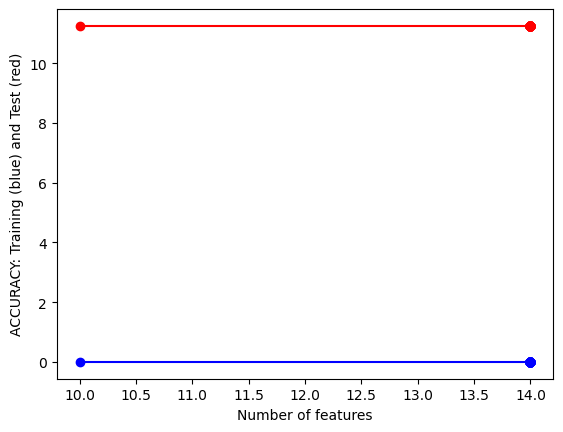

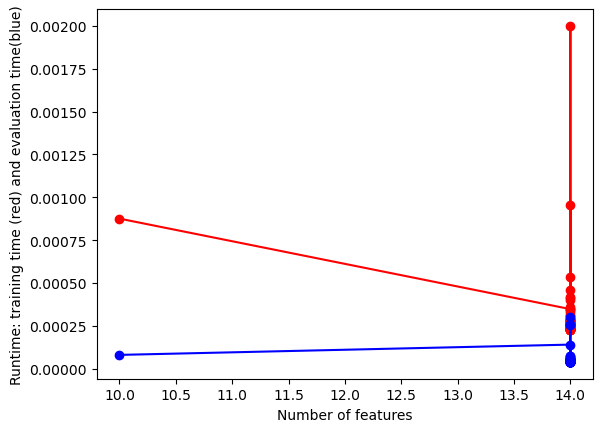

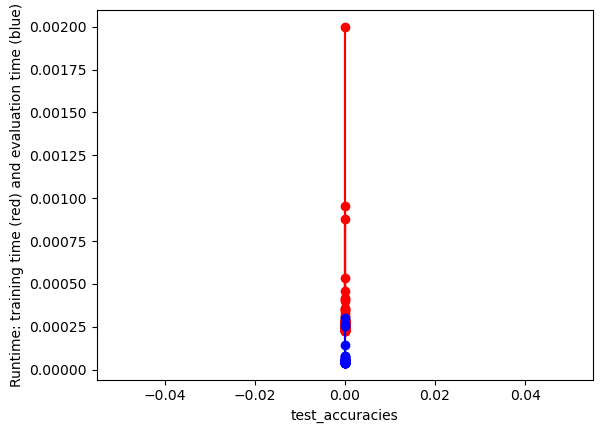

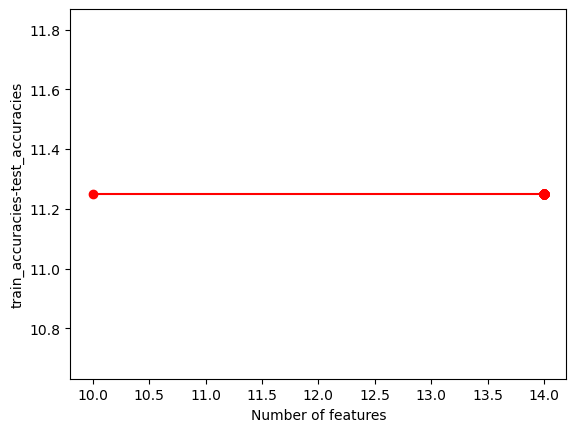

In [65]:
save_results(output_dir+"/ev-partial_grid_search")
plot_results(output_dir+"/ev-partial_grid_search")

The images show that as the number of features increases, test accuracy remains relatively constant while training accuracy is higher. The runtime for both training (blue) and evaluation (red) also increases, with evaluation time seeing a sharper rise at around 13.5 features.

## Naïve Bayes (NB) with Labeled Record Data

In [66]:
from sklearn.naive_bayes import MultinomialNB

# INITIALIZE MODEL 
model = MultinomialNB()

# TRAIN MODEL 
model.fit(x_train,y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 83.75
Number of mislabeled points out of a total 80 points = 13

TEST SET (UNTRAINED DATA):
Accuracy: 60.0
Number of mislabeled points out of a total 20 points = 8

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[11  9 13 14  1 13  3 11  0 11 11 11 13  7 13 13 11 10 11 13]
[11  9 13 11  1 13 13 11  0 11 11 11 13 13 13 13 11 13 11 13]
ERRORS: [ 0  0  0 -3  0  0 10  0  0  0  0  0  0  6  0  0  0  3  0  0]

TEST SET (UNTRAINED DATA):
[13  1  5  5 11 13  8 13 13 11 13  3  6 10  1 13  2  3 13 13]
[13  3 13  5 11 13 13 13 13 11 13  3 13 13 11 13 11 11 13 13]
ERRORS: [ 0  2  8  0  0  0  5  0  0  0  0  0  7  3 10  0  9  8  0  0]


Overfitting is when a model performs well on training data but poorly on testing data Under-fitting is when a model performs poorly on both. This model has a training accuracy of 83.75% and a testing accuracy of 60%. This significant drop suggests the model might be overfitting since it's not generalizing well to unseen data.

In [67]:
# source: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(x_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6
F1 Score: 0.7061904761904763


The model achieved ~ 81.25% accuracy on the training set and 60% on the test set. The test set had 8 mislabeled points out of 20. The provided predictions for both sets show specific errors compared to the expected values.

In [68]:
print("Unique classes in y_test:", np.unique(y_test))
print("Number of unique classes in y_test:", len(np.unique(y_test)))

print("Unique classes in y_pred:", np.unique(y_pred))
print("Number of unique classes in y_pred:", len(np.unique(y_pred)))


Unique classes in y_test: [ 1  2  3  5  6  8 10 11 13]
Number of unique classes in y_test: 9
Unique classes in y_pred: [ 3  5 11 13]
Number of unique classes in y_pred: 4


### Confusion matrix

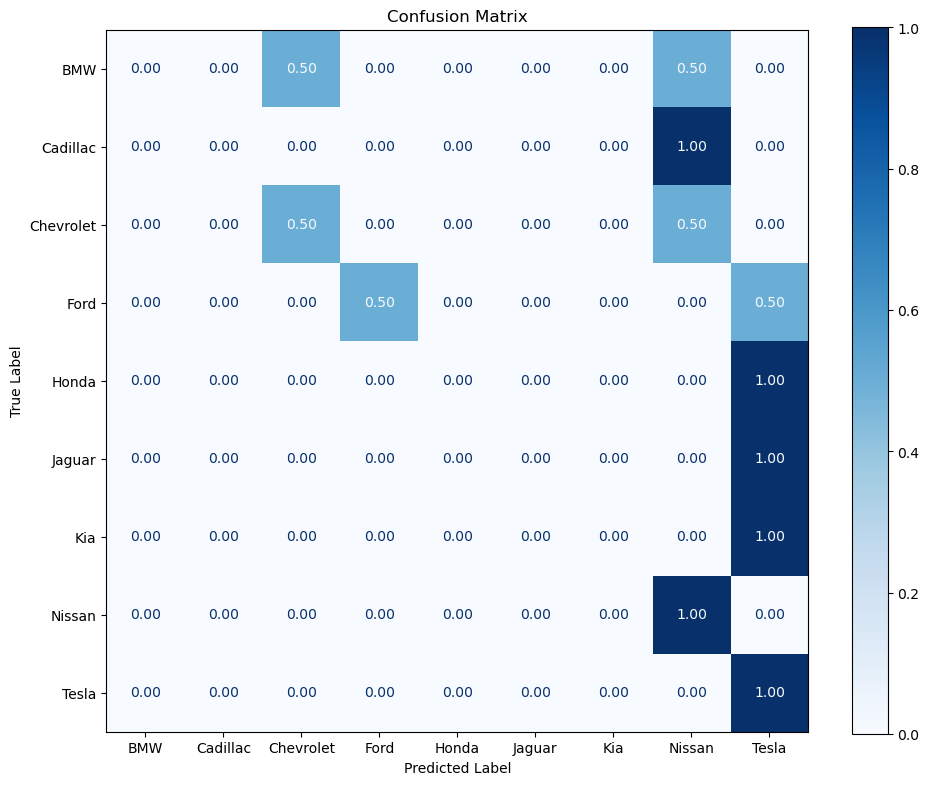

In [72]:
# source: https://developer.ibm.com/tutorials/awb-classifying-data-multinomial-naive-bayes-algorithm/

labels = ["BMW", "Cadillac", "Chevrolet", "Ford", "Honda", "Jaguar", "Kia", "Nissan", "Tesla"]

cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".2f")

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

The confusion matrix shows predictions for car brands. Most brands were correctly predicted with a 1.0 score, except for Ford, which was misclassified 50% of the time.

### Compute distance matrix

Distance between sentence vectors for a subset of data

(250, 250)
[[ 0.          0.00315014  0.00315014 ... -0.00280833 -0.00280833
  -0.00280833]
 [ 0.00315014  0.          0.00315014 ... -0.00280833 -0.00280833
  -0.00280833]
 [ 0.00315014  0.00315014  0.         ... -0.00280833 -0.00280833
  -0.00280833]
 ...
 [-0.00280833 -0.00280833 -0.00280833 ...  0.         -0.00220795
  -0.00220795]
 [-0.00280833 -0.00280833 -0.00280833 ... -0.00220795  0.
  -0.00220795]
 [-0.00280833 -0.00280833 -0.00280833 ... -0.00220795 -0.00220795
   0.        ]]


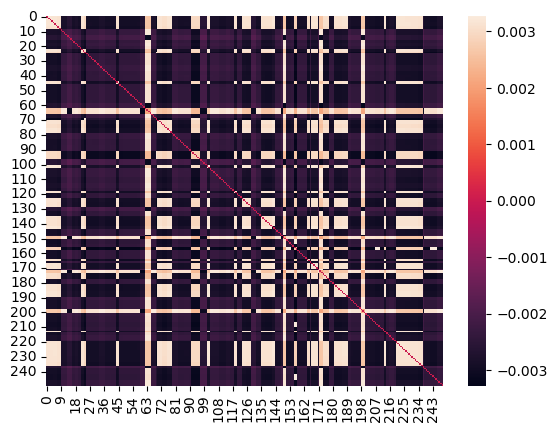

In [75]:
import numpy as np

num_rows_keep=250
index=np.sort(np.random.choice(x.shape[0], num_rows_keep))
# print(y1[index])
#print(index)
# tmp1=x[index, :]
x_np = x.to_numpy()
tmp1 = x_np[index, :]
# print(tmp1.shape,tmp1.dtype,tmp1[:,].shape)

#COMPUTE DISTANCE MATRIX
dij=[]

#LOOP OVER ROWS
for i in range(0,tmp1.shape[0]):
    tmp2=[]
    #LOOP OVER ROWS
    for j in range(0,tmp1.shape[0]):

        #EXTRACT VECTORS
        vi=tmp1[i,:]
        vj=tmp1[j,:]
        #print(vi.shape,vj.shape)

        #COMPUTE DISTANCES
        dist=np.dot(vi, vj)/(np.linalg.norm(vi)*np.linalg.norm(vj)) #cosine sim
        #dist=np.linalg.norm(vi-vj) #euclidean

        # BUILD DISTANCE MATRIX
        if(i==j or np.max(vi) == 0 or np.max(vj)==0):
            tmp2.append(0)
        else:
            tmp2.append(dist)
    dij.append(tmp2); #print(dij)
        # raise
dij=np.array(dij)

#normalize
# dij=(dij-np.min(dij))/(np.max(dij)-np.min(dij))

#Lower triangle of an array.
# dij=np.sort(dij,axis=0)
# dij=np.sort(dij,axis=1)
# dij=np.tril(dij, k=-1) 


import seaborn as sns
# sns.heatmap(np.exp(dij), annot=False) #,  linewidths=.05)
sns.heatmap(dij, annot=False) #,  linewidths=.05)
print(dij.shape)
print(dij)

This is a heatmap representing data values in a matrix format. The diagonal line suggests a correlation between corresponding x and y values. Color intensity indicates the magnitude of the data, with darker shades likely representing higher values and lighter shades representing lower values. The color bar on the right provides a reference for the data values.

### PCA

[0.02781853 0.01541431 0.01311659 0.01048451 0.00973921 0.00917557
 0.00862737 0.00806667 0.00700501 0.00655575]
[43.65947765 32.49926222 29.97933139 26.80312728 25.83290382 25.07424996
 24.3136751  23.51032071 21.90865485 21.19447635]


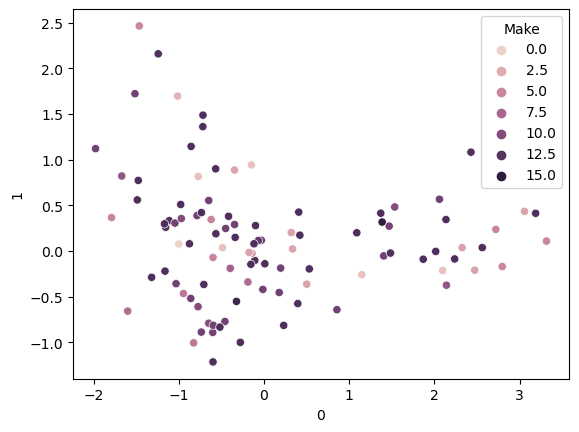

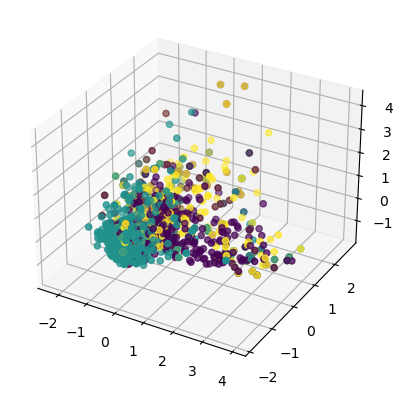

/Users/isfarbaset/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


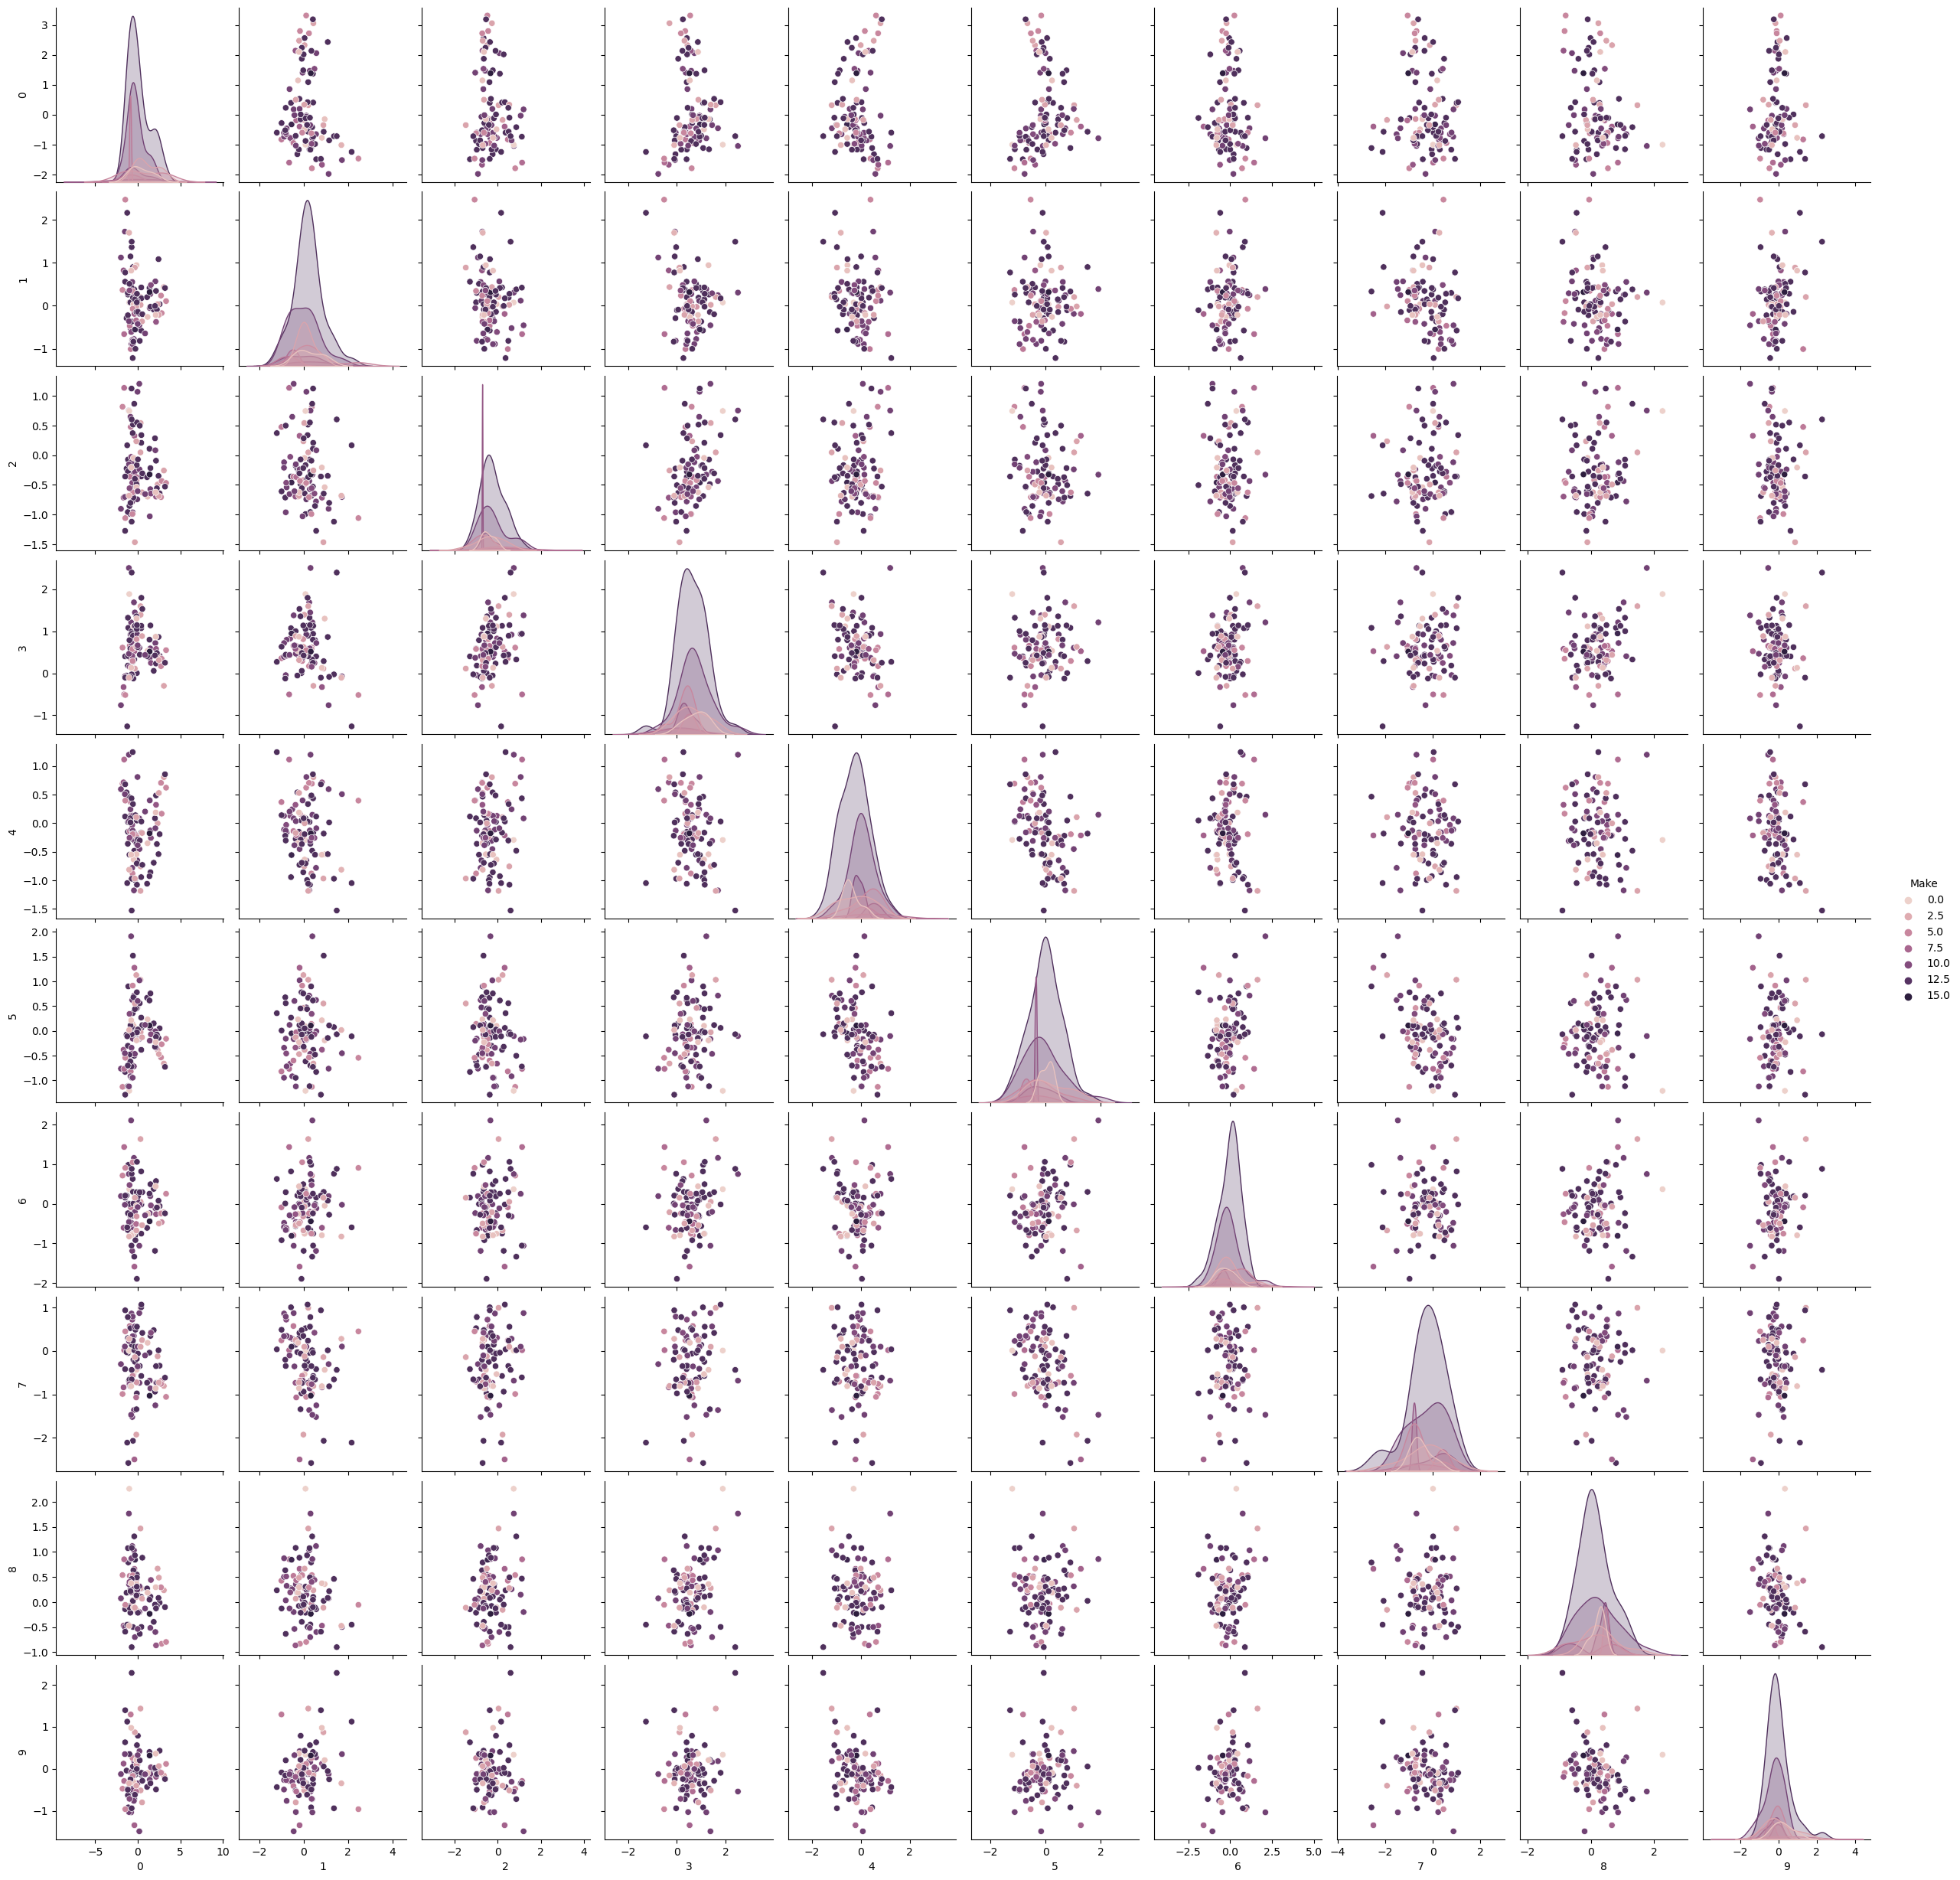

In [74]:
from sklearn.decomposition import PCA

# COMPUTE PCA WITH 10 COMPONENTS
pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

# GET PRINCIPLE COMPONENT PROJECTIONS 
principal_components = pca.fit_transform(X)
df2 = pd.DataFrame(data = principal_components) #, columns = ['PC1','PC2','PC3','PC4','PC5'])
df3=pd.concat([df2,df['Make']], axis=1)

# FIRST TWO COMPONENTS
sns.scatterplot(data=df2, x=0, y=1,hue=df["Make"]) 
plt.show()

#3D PLOT
ax = plt.axes(projection='3d')
ax.scatter3D(df2[0], df2[1], df2[2], c=y1);
plt.show()

#PAIRPLOT
sns.pairplot(data=df3,hue="Make") #.to_numpy()) #,hue=df["label"]) #, hue="time")
plt.show()


The first image is a pair plot showing relationships between multiple variables, with histograms on the diagonal indicating distributions. The second image is a 2D scatter plot with points colored based on 'Make'. The third is a 3D scatter plot displaying data distribution in three dimensions, with points colored by categories.

# Conclusion

For text and record data related t electric vehicles, the model is trained on the training dataset and then its accuracy is evaluated on both the training and testing datasets. The testing accuracy indicates how well the model performs on unseen data.

The project findings will be documented in a report with sections for introduction, methodology, results, and conclusions. Key findings will be visualized using charts and graphs. A summarized PowerPoint presentation can also be prepared by highlighting major insights and recommendations. More details surrounding machine learning classification preocdecures and methods will be added as well. Additionally the organizational flow of information presented on this page has room for improvement as well. 

Sources used: <br>

https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners <br>
https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20bayes%20is%20a%20supervised%20learning%20algorithm%20for%20classification%20so,x2%20%2C%20%E2%80%A6%20%2C%20xn)). <br>
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/#:~:text=In%20statistics%2C%20naive%20Bayes%20classifiers,data%20and%20some%20prior%20knowledge. <br>
